# Martin Krücke, Jana Kölher and Martin Iniguez de Onzono Muruaga. Sheet 06

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from helpers_sheet02 import pca_sorted_eig
import scipy.stats
import seaborn as sns
import pandas as pd

# Maximizing nongaussianity
## Exercise H6.1: Kurtosis of Toy Data

### a) Apply the following mixing matrix A.

In [2]:
# load data (2 x 10 000)
mat = scipy.io.loadmat('distrib.mat')
s_uniform = mat['uniform']
s_normal = mat['normal']
s_laplacian = mat['laplacian']

# apply mixing matrix A
A = np.array([[4, 3], [2, 1]])
x_uniform = A @ s_uniform
x_normal = A @ s_normal
x_laplacian = A @ s_laplacian
print(x_uniform.shape)

(2, 10000)


In [3]:
def plot(x,labels):
    df = pd.DataFrame({'X': x[0,:],'Y': x[1,:]})
    sns.jointplot(x='X', y='Y', edgecolor='white', data=df)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(labels)
    plt.tight_layout()

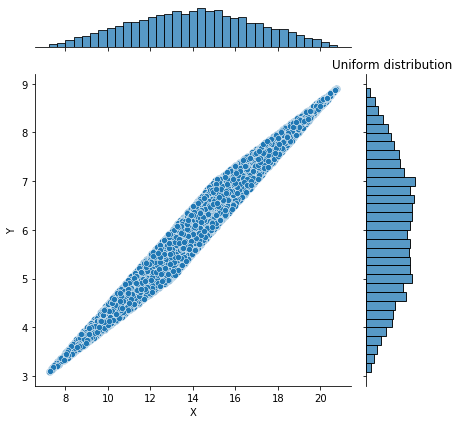

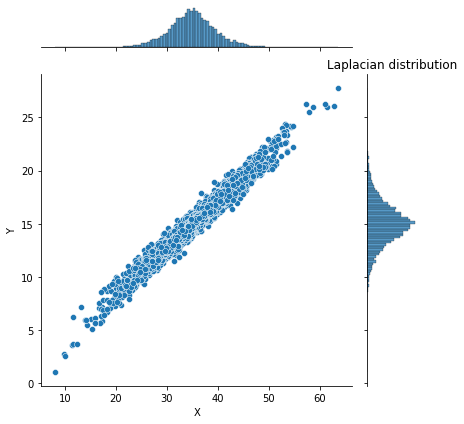

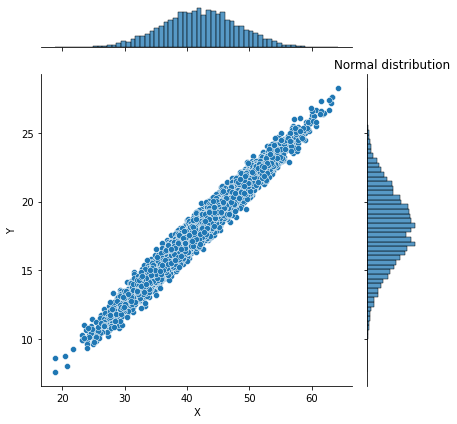

In [4]:
plot(x_uniform,'Uniform distribution')

plot(x_laplacian,'Laplacian distribution')

plot(x_normal,'Normal distribution')

### b) Center the mixtures x to zero mean.

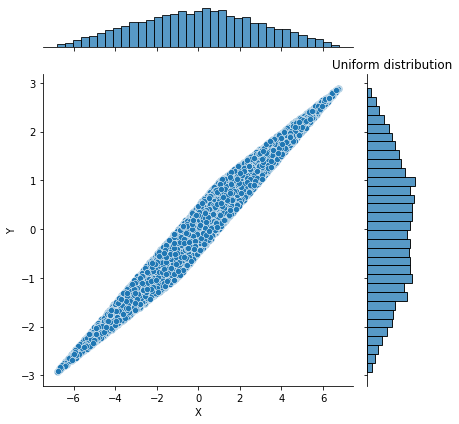

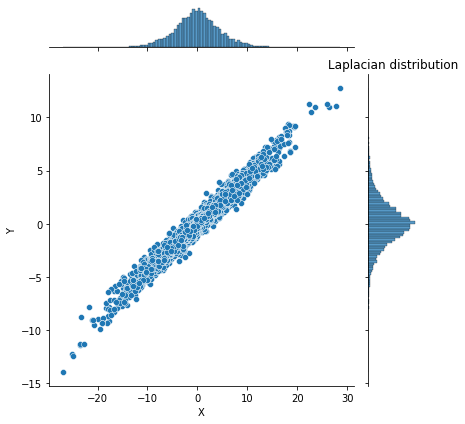

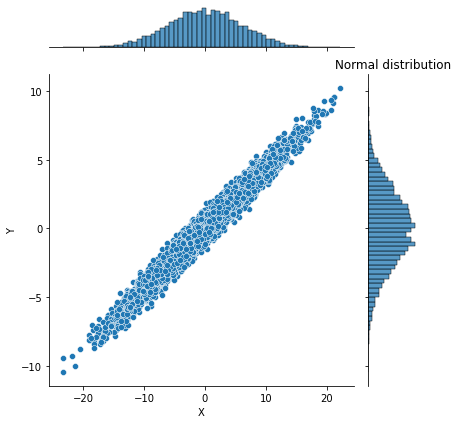

In [5]:
uni_cent = (x_uniform.T-np.mean(x_uniform,axis=1)).T
normal_cent = (x_normal.T-np.mean(x_normal,axis=1)).T
laplacian_cent = (x_laplacian.T-np.mean(x_laplacian,axis=1)).T

plot(uni_cent,'Uniform distribution')

plot(laplacian_cent,'Laplacian distribution')

plot(normal_cent,'Normal distribution')


### c & d) Whiten your mixtures.

In [6]:
# X = x_uniform.T
# n, m = X.shape

# # Compute covariance matrix
# C = np.dot(X.T, X) / (n-1)
# # Eigen decomposition
# eigen_vals, eigen_vecs = np.linalg.eig(C)

# # sort components according to eigenvalues
# idx = eigen_vals.argsort()[::-1]
# sorted_eigenvals = eigen_vals[idx]
# sorted_eigenvecs = eigen_vecs[:,idx]
# # Project X onto PC space
# X_pca = np.dot(X, eigen_vecs)


In [7]:
# '''Decorrelate the mixtures from (b) by applying principal component analysis (PCA) on them
# and project them onto the PCs.'''

# sorted_eigenvals, sorted_eigenvecs, X_pca = pca_sorted_eigh(x_uniform)
# print(X_pca)

# unit variance 
# x_dec /= np.sqrt)eigenvalue

In [8]:
def whitening(X):

    cov = np.cov(X)
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.T.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = scipy.stats.zscore(decorrelated).T
    return whitened

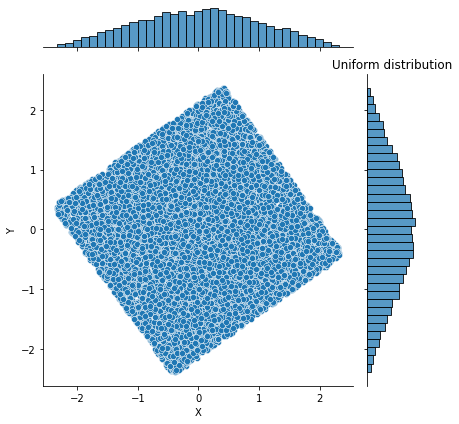

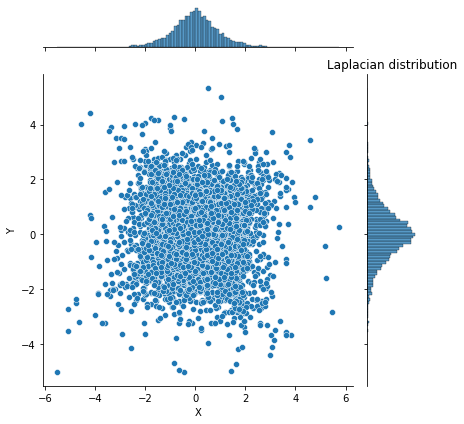

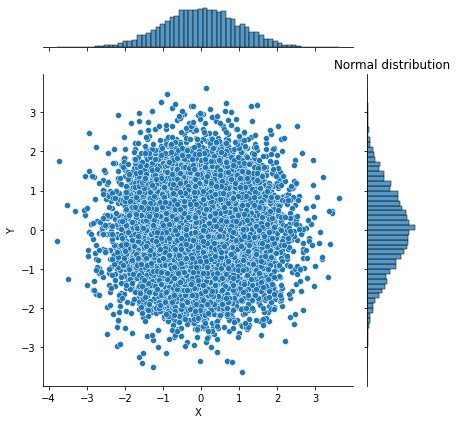

In [9]:
uni_whit = whitening(uni_cent)
lapl_whit = whitening(laplacian_cent)
normal_whit = whitening(normal_cent)

plot(uni_whit,'Uniform distribution')

plot(lapl_whit,'Laplacian distribution')

plot(normal_whit,'Normal distribution')

### e) Rotate the whitened mixtures by different angles.

In [10]:
def find_kurtosis(x):

    theta = np.linspace(0,2,100)*np.pi
    x_rot = np.empty((theta.shape[0],x.shape[0],x.shape[1]))
    kurtos = np.empty((x.shape[0],theta.shape[0]))

    for i,ang in enumerate(theta):
        c, s = np.cos(ang), np.sin(ang)
        R = np.array([(c, -s), (s, c)])
        x_rot[i,:,:] = R @ x
        kurtos[:,i]= scipy.stats.kurtosis(x_rot[i,:,:],axis=1)

    return x_rot,kurtos

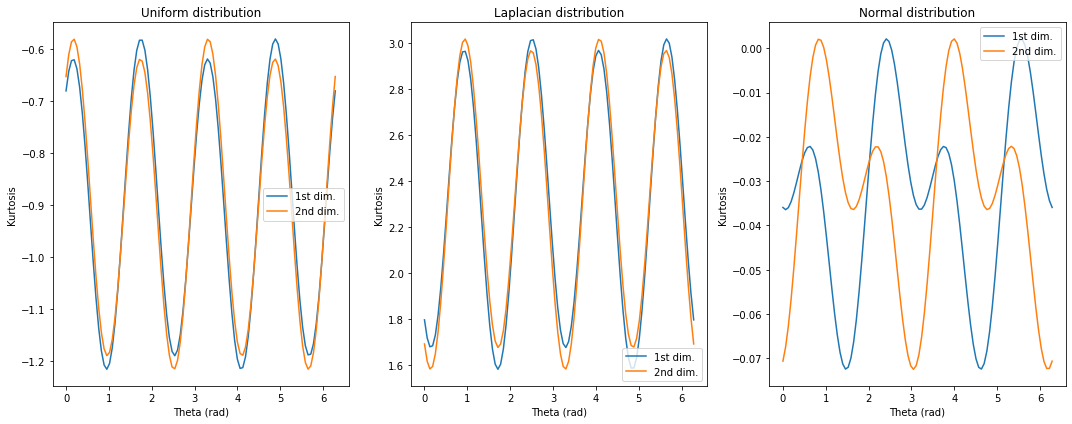

In [11]:
fig = plt.figure(figsize=(15,6))
theta = np.linspace(0,2,100)*np.pi

fig.add_subplot(1,3,1)

uni_rot, uni_kurt = find_kurtosis(uni_whit)
plt.plot(theta,uni_kurt[0,:],label='1st dim.')
plt.plot(theta,uni_kurt[1,:],label='2nd dim.')
plt.xlabel('Theta (rad)')
plt.title('Uniform distribution')
plt.ylabel('Kurtosis')
plt.legend()


fig.add_subplot(1,3,2)

lapl_rot, lapl_kurt = find_kurtosis(lapl_whit)
plt.plot(theta,lapl_kurt[0,:],label='1st dim.')
plt.plot(theta,lapl_kurt[1,:],label='2nd dim.')
plt.xlabel('Theta (rad)')
plt.title('Laplacian distribution')
plt.ylabel('Kurtosis')
plt.legend()

fig.add_subplot(1,3,3)

normal_rot, normal_kurt = find_kurtosis(normal_whit)
plt.plot(theta,normal_kurt[0,:],label='1st dim.')
plt.plot(theta,normal_kurt[1,:],label='2nd dim.')
plt.xlabel('Theta (rad)')
plt.title('Normal distribution')
plt.ylabel('Kurtosis');
plt.legend()


plt.tight_layout();

### f) Find the minimum and maximum kurtosis value and rotate the data accordingly.

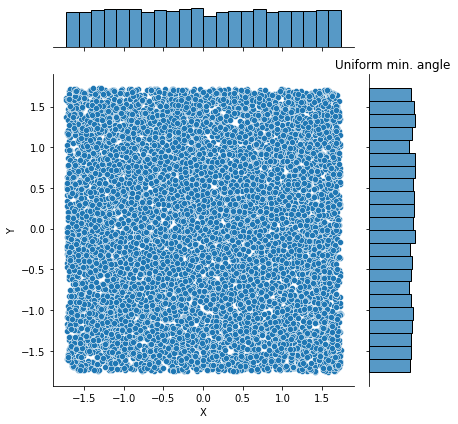

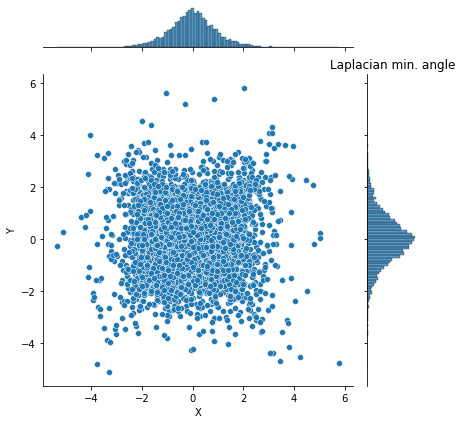

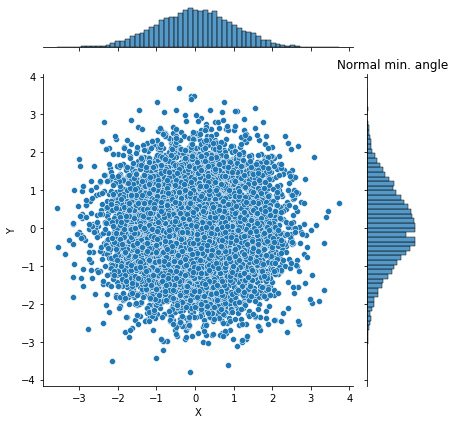

In [12]:
uni_min = np.argmin(uni_kurt[0,:])
uni_max = np.argmax(uni_kurt[0,:])

lap_min = np.argmin(lapl_kurt[0,:])
lap_max = np.argmax(lapl_kurt[0,:])

normal_min = np.argmin(normal_kurt[0,:])
normal_max = np.argmax(normal_kurt[0,:])

plot(uni_rot[uni_min],'Uniform min. angle')

plot(lapl_rot[lap_min],'Laplacian min. angle')

plot(normal_rot[normal_min],'Normal min. angle')

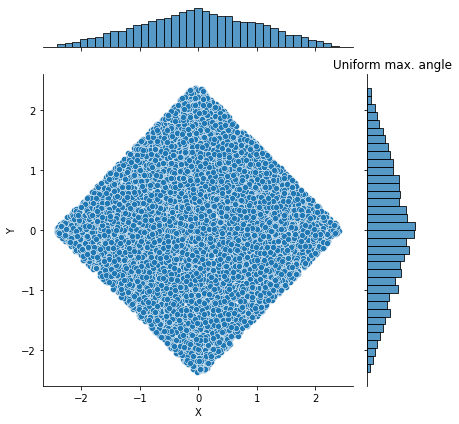

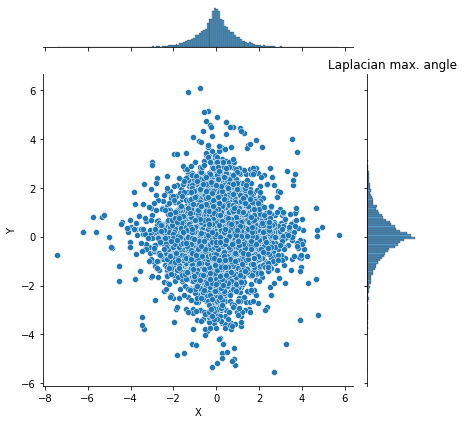

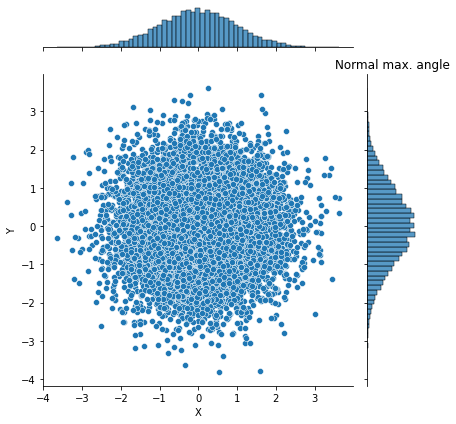

In [13]:
plot(uni_rot[uni_max],'Uniform max. angle')

plot(lapl_rot[lap_max],'Laplacian max. angle')

plot(normal_rot[normal_max],'Normal max. angle')

#### Compare the histograms for the different distributions.

The differences are most clearly visible for the uniform and laplacian distribution:
- for the angle corresponding to the min. kurtosis the histograms on the collapsed axes: 
    - are uniform for the uniform distribution
    - remind of a exp(- x**2)-distribution that is not very steep for the laplacian distr.
- for the angle corresponding to the max. kurtosis the histograms on the collapsed axes: 
    - are kind of triangular for the uniform distribution
    - resemples laplacian for the laplacian distribution
    
-> this is what we expect since kurtosis is a measure for 'steepness' of distributions


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b99e2596-0367-4d67-802d-398a8bebc31e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>